In [1]:
import sys
import tomotopy as tp

In [16]:
from matplotlib import pyplot as plt
import numpy as np

In [32]:
from sklearn.metrics import pairwise_distances

In [2]:
mdl = tp.LDAModel.load('lda1.bin')

In [29]:
pts = []
tpc = []
tpc_p = []

for n, line in enumerate(open('export_dataframe.csv', encoding='utf-8')):
    if n == 0:
        continue
        
    title = line.split(",")[-1]
    ch = title.lower().strip().split()
    
    x,y = map(float, line.split(',')[1:3])
    
    topics = mdl.infer(mdl.make_doc(ch))[0]
    for ti, t in enumerate(topics):
        if t >= 0.5:
            tpc.append(ti)
            tpc_p.append(t)
            pts.append((x,y))

KeyboardInterrupt: 

In [30]:
ptsarr = np.array(pts)

In [33]:
distances = pairwise_distances(ptsarr)

In [34]:
distances.shape

(11240, 11240)

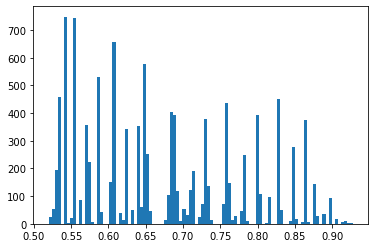

In [43]:
plt.hist(tpc_p, bins=100);

In [45]:
ptsarr.shape

(11240, 2)

In [69]:
xmn,xmx = (lambda x:(x.min(), x.max()))(ptsarr[:,0])
ymn,ymx = (lambda x:(x.min(), x.max()))(ptsarr[:,1])

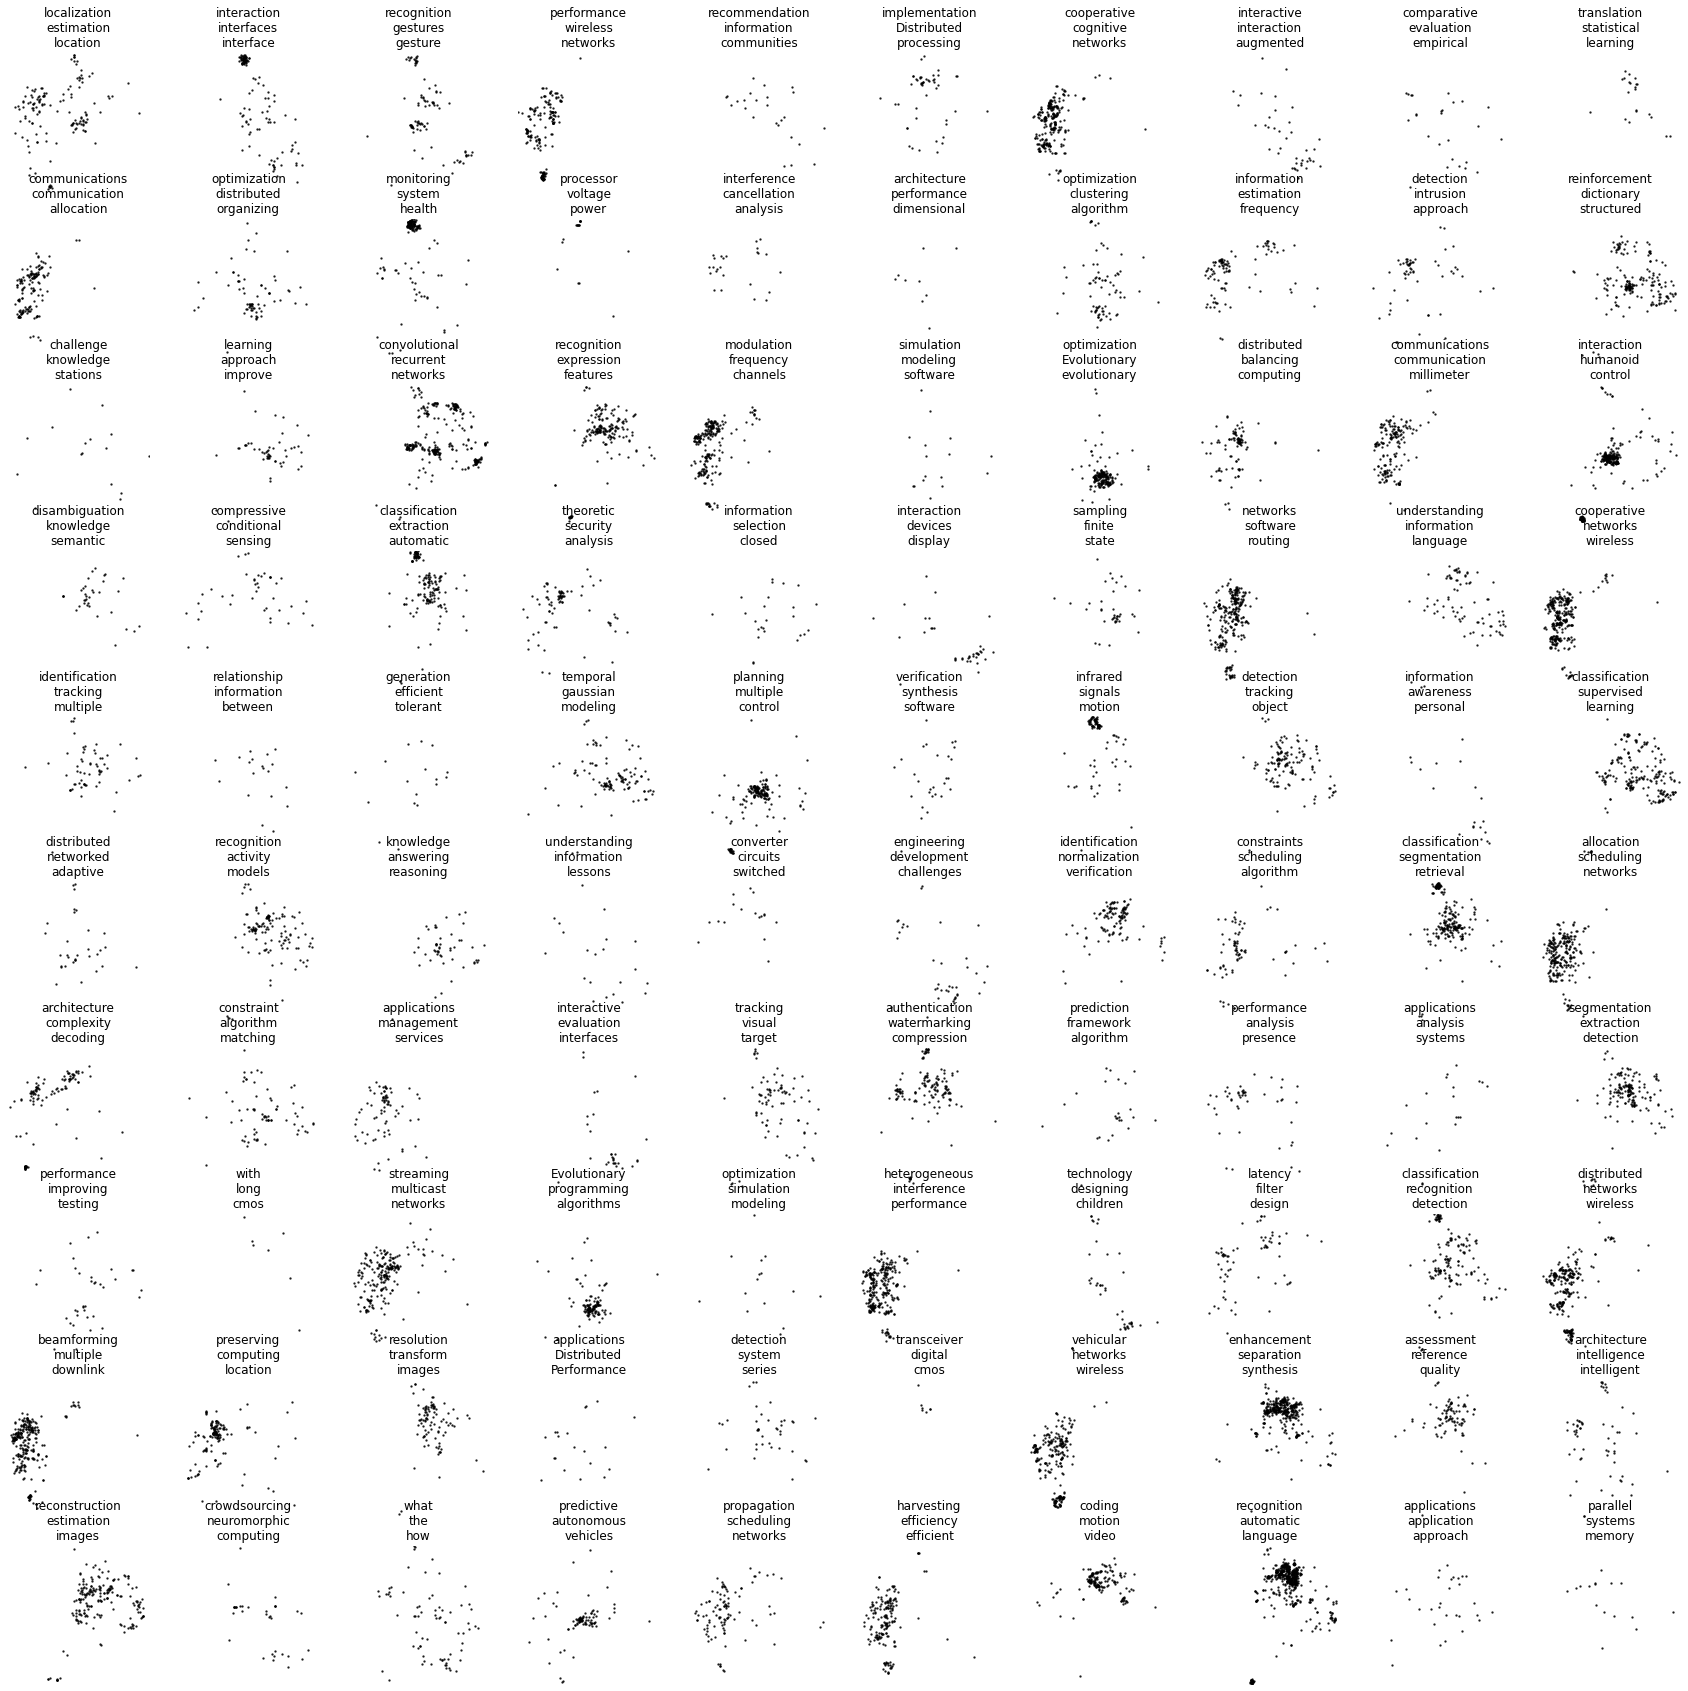

In [77]:
plt.figure(figsize=(30,30))

for i in range(100):
    plt.subplot(10,10,i+1)
    
    idx = np.array(tpc) == i

    plt.scatter(
        ptsarr[idx,0],
        ptsarr[idx,1],
        s = 2,
        color='black',
        alpha=0.7
    )
    words = [x[0] for x in mdl.get_topic_words(i, 10)]
    words = sorted(words, key=lambda x:-len(x))
    words = words[:3]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.box(False)
    plt.xlim(xmn,xmx)
    plt.ylim(ymn,ymx)
    plt.title("\n".join(words))
    